In [1]:
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

2025-06-24 11:50:28.099125: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750746028.205696    5842 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750746028.238793    5842 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750746028.459281    5842 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750746028.459334    5842 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750746028.459337    5842 computation_placer.cc:177] computation placer alr

In [3]:
BASE_DIR = 'catsanddogs'
train_dir = os.path.join(BASE_DIR,'train')
validation_dir = os.path.join(BASE_DIR, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
valid_cats_dir = os.path.join(validation_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')
valid_dogs_dir = os.path.join(validation_dir, 'dogs')



In [4]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(f"5 files in cats subdir: {train_cat_fnames[:5]}")
print(f"5 files in dogs subdir: {train_dog_fnames[:5]}")

5 files in cats subdir: ['944.jpg', '333.jpg', '535.jpg', '107.jpg', '668.jpg']
5 files in dogs subdir: ['944.jpg', '333.jpg', '535.jpg', '107.jpg', '668.jpg']


In [6]:
print(f'total training cat images: {len(os.listdir(train_cats_dir))}')
print(f'total training dog images: {len(os.listdir(train_dogs_dir))}')

print(f'total validation cat images: {len(os.listdir(valid_cats_dir))}')
print(f'total validation dog images: {len(os.listdir(valid_dogs_dir))}')

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


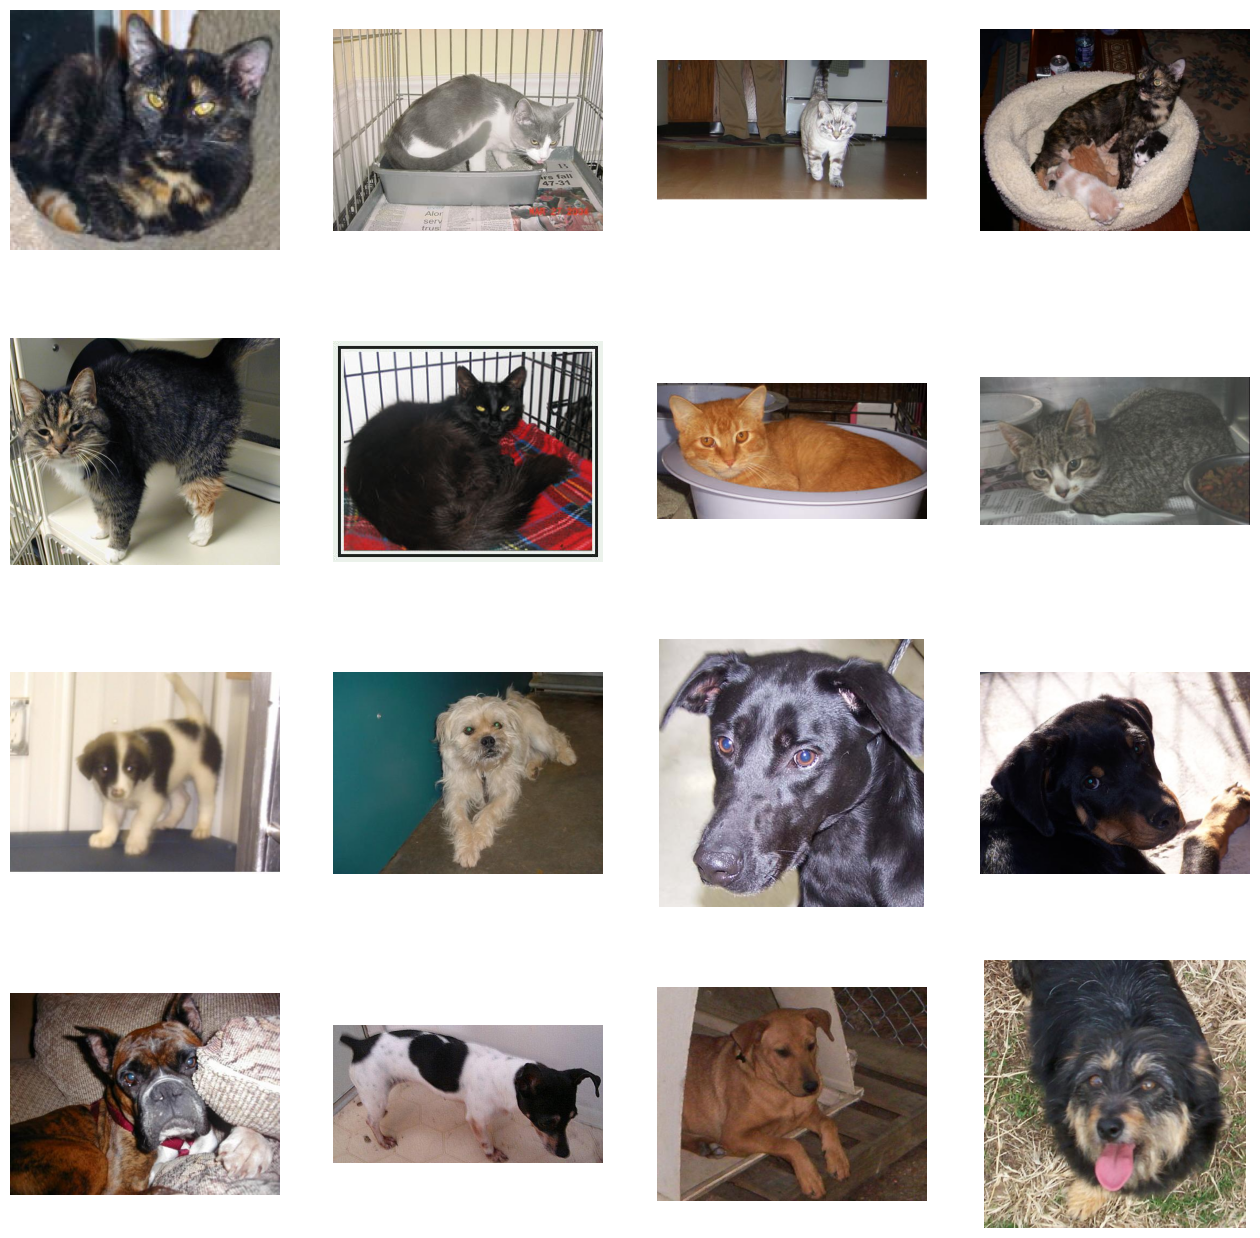

In [9]:
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
next_cat_pix = [os.path.join(train_cats_dir, fname)
              for fname in random.sample(train_cat_fnames, k=8)]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in random.sample(train_dog_fnames, k=8)]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150,150, 3)),
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2025-06-24 13:05:07.252605: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [14]:
train_dataset=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode='binary'
)
valid_dataset=tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode='binary'
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


cache() stores elements in memory as you use them so it will be faster to retrieve if you need them again
shuffle(), as the name suggests, shuffles the dataset randomly. A buffer_size of 1000 means it will first select a sample from the first 1,000 elements, then keep filling this buffer until all elements have been selected.
prefetch() gets elements while the model is training so it's faster to feed in new data when the current training step is finished. A buffer_size set to tf.data.AUTOTUNE dynamically sets the number of elements to prefetch during runtime.

In [16]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = train_dataset.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)
validation_dataset_final = valid_dataset.cache().prefetch(PREFETCH_BUFFER_SIZE)

In [18]:
history = model.fit(
    train_dataset_final,
    epochs=5,
    validation_data=validation_dataset_final,
    verbose=2
)

Epoch 1/5


2025-06-24 13:15:24.559545: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/anjana/.local/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


100/100 - 42s - 420ms/step - accuracy: 0.5354 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 2/5
100/100 - 39s - 389ms/step - accuracy: 0.6045 - loss: 0.6644 - val_accuracy: 0.6240 - val_loss: 0.6510
Epoch 3/5


2025-06-24 13:16:40.141115: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 - 36s - 358ms/step - accuracy: 0.6576 - loss: 0.6317 - val_accuracy: 0.6160 - val_loss: 0.6408
Epoch 4/5
100/100 - 36s - 360ms/step - accuracy: 0.6848 - loss: 0.5982 - val_accuracy: 0.6330 - val_loss: 0.6279
Epoch 5/5
100/100 - 37s - 373ms/step - accuracy: 0.7086 - loss: 0.5670 - val_accuracy: 0.6530 - val_loss: 0.6191


In [22]:
from IPython.display import display
import ipywidgets as widgets
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(150, 150))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a dog")
        else:
            print(filename + " is a cat")


def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)


uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()